In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
%matplotlib inline

First, we'll read in the GDP necessary from the Wikipedia page of the 'Economic History of the United States'

In [2]:
df = pd.read_html('https://en.wikipedia.org/wiki/Economic_history_of_the_United_States#GDP')[6]
df.columns = ['Year',
              'Nominal GDP',
              'Adjusted GDP',
              'Population',
              'Nominal GDP Per Capita',
              'Adjusted GDP Per Capita']
df.head()

,Year,Nominal GDP,Adjusted GDP,Population,Nominal GDP Per Capita,Adjusted GDP Per Capita
0,1790,0.19,3.60,3.929,48,916
1,1791,0.21,3.82,4.048,52,944
2,1792,0.22,4.10,4.171,53,983
3,1793,0.25,4.43,4.297,58,1031
4,1794,0.31,5.00,4.428,70,1129


### Data Transformation

We want to look at the relationship between Population and GDP per Capita via a **scatterplot**.

Text(0.5, 0.92, 'Population vs. GDP Per Capita in America')

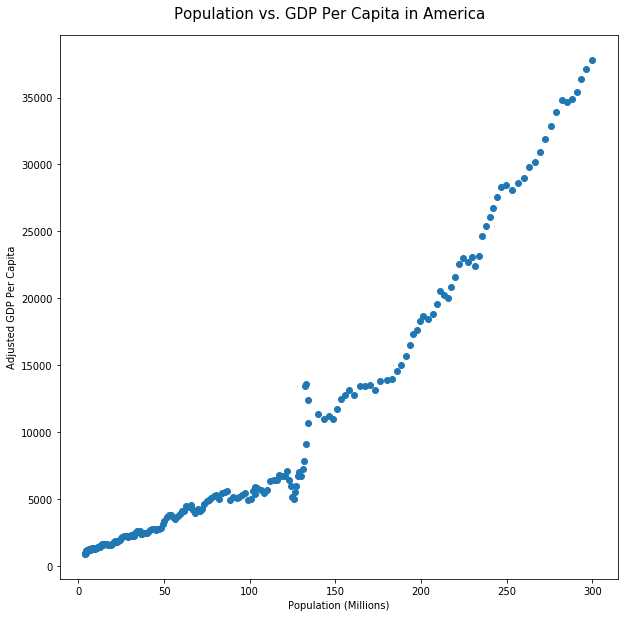

In [3]:
fig = plt.figure(figsize=(10,10))
plt.scatter(df['Population'], df['Adjusted GDP Per Capita'])
plt.xlabel('Population (Millions)')
plt.ylabel('Adjusted GDP Per Capita')
fig.suptitle('Population vs. GDP Per Capita in America', fontsize=15, y=0.92)

As mentioned during lecture, this relationship isn't quite linear - additionally, it looks like there are many more datapoints on the lower end of the distribution.

Text(0.5, 0.92, 'Distribution of Population in American History')

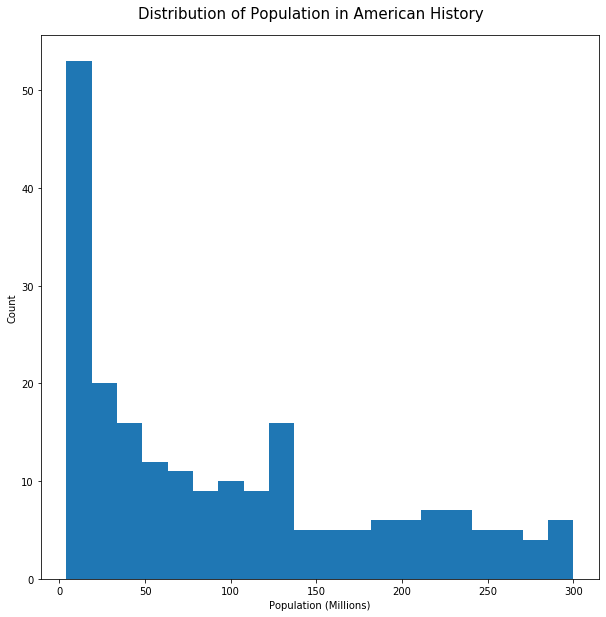

In [4]:
fig = plt.figure(figsize=(10,10))
plt.hist(df['Population'], bins=20)
plt.xlabel('Population (Millions)')
plt.ylabel('Count')
fig.suptitle('Distribution of Population in American History', fontsize=15, y=0.92)

There are clearly many more datapoints on the lower end of the distribution, making this a *positively skewed* distribution. We want the data look unskewed and should try and apply some transformations to it.

First, we'll take the log of the data.

Text(0.5, 0.92, 'Log Distribution of Population in American History')

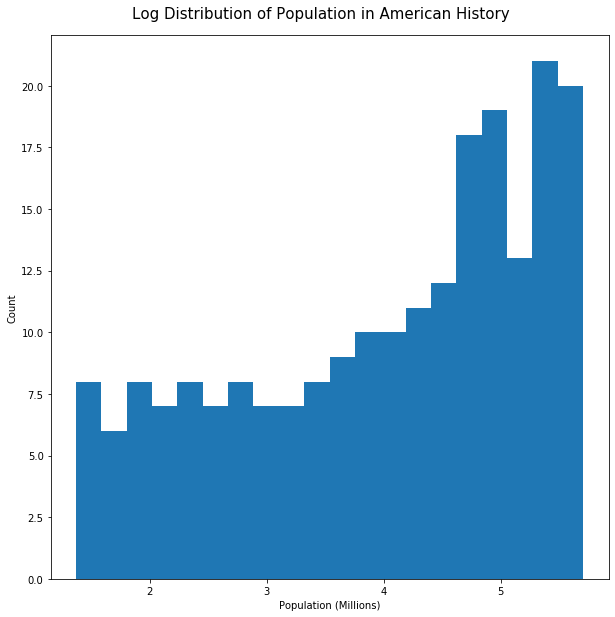

In [5]:
fig = plt.figure(figsize=(10,10))
plt.hist(np.log(df['Population']), bins=20)
plt.xlabel('Population (Millions)')
plt.ylabel('Count')
fig.suptitle('Log Distribution of Population in American History', fontsize=15, y=0.92)

This is much better relative to the initial distribution, though it now looks like the data is skewed the other way.

Note that if you're taking a log of a distribution that all of the data must be *positive*, as you cannot take the log value of a negative number.

Next we'll try and take the square root of the initial distribution.

Text(0.5, 0.92, 'Square Root of Distribution of GDP Per Capita in American History')

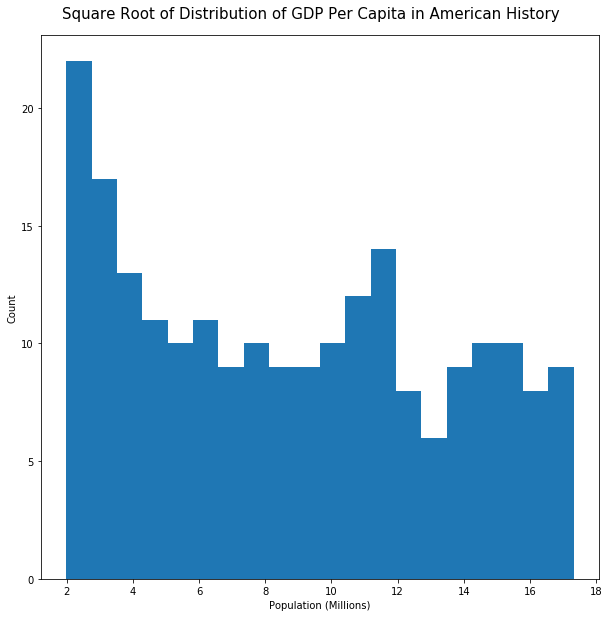

In [6]:
fig = plt.figure(figsize=(10,10))
plt.hist(np.power(df['Population'], 1/2), bins=20)
plt.xlabel('Population (Millions)')
plt.ylabel('Count')
fig.suptitle('Square Root of Distribution of GDP Per Capita in American History', fontsize=15, y=0.92)

Again, this still looks slightly skewed. Let's try to get the cubed root of the distribution.

Text(0.5, 0.92, 'Cubed Root of Distribution of GDP Per Capita in American History')

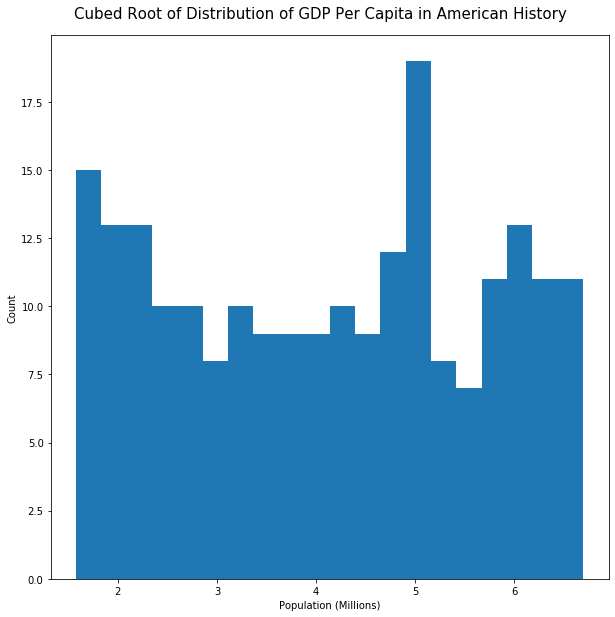

In [7]:
fig = plt.figure(figsize=(10,10))
plt.hist(np.power(df['Population'], 1/3), bins=20)
plt.xlabel('Population (Millions)')
plt.ylabel('Count')
fig.suptitle('Cubed Root of Distribution of GDP Per Capita in American History', fontsize=15, y=0.92)

This looks much better. Let's look at the distribution of Adjusted GDP Per Capita.

Text(0.5, 0.92, 'Distribution of GDP Per Capita')

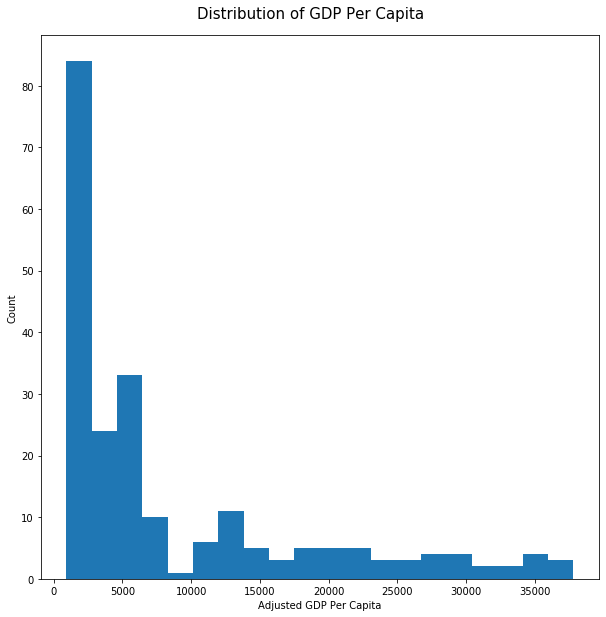

In [8]:
fig = plt.figure(figsize=(10,10))
plt.hist(df['Adjusted GDP Per Capita'], bins=20)
plt.xlabel('Adjusted GDP Per Capita')
plt.ylabel('Count')
fig.suptitle('Distribution of GDP Per Capita', fontsize=15, y=0.92)

Again, this is very skewed - let's take the log.

Text(0.5, 0.92, 'Log Distribution of GDP Per Capita in American History')

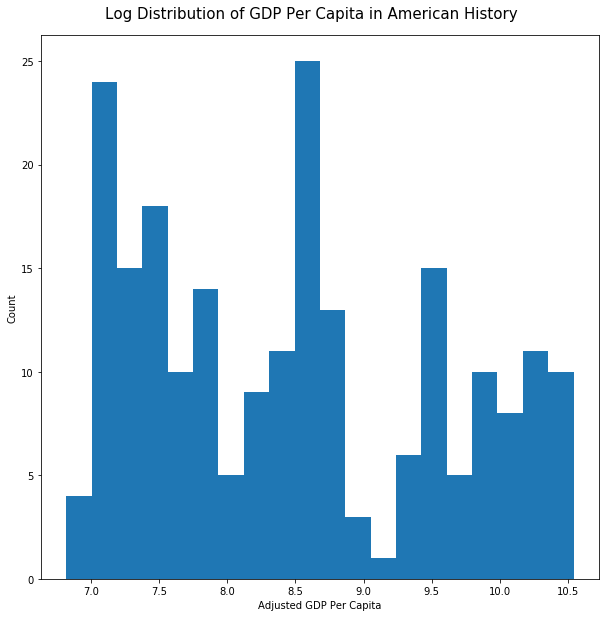

In [9]:
fig = plt.figure(figsize=(10,10))
plt.hist(np.log(df['Adjusted GDP Per Capita']), bins=20)
plt.xlabel('Adjusted GDP Per Capita')
plt.ylabel('Count')
fig.suptitle('Log Distribution of GDP Per Capita in American History', fontsize=15, y=0.92)

Text(0.5, 0.92, 'Population vs. GDP')

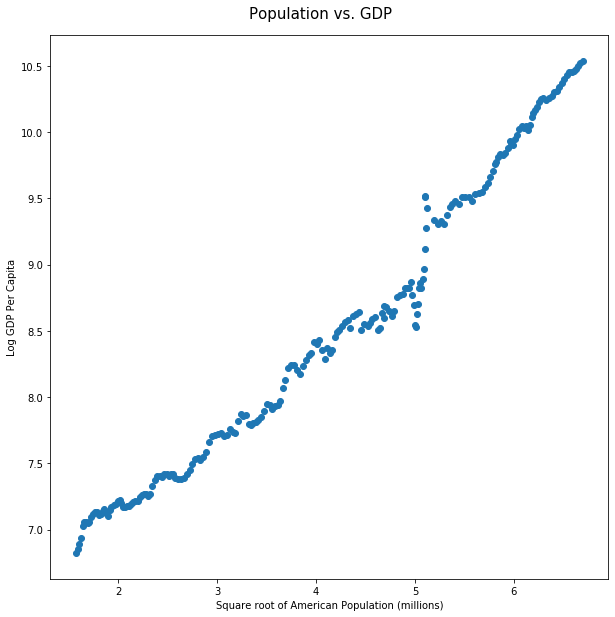

In [10]:
fig = plt.figure(figsize=(10,10))
plt.scatter(np.power(df['Population'], 1/3), np.log(df['Adjusted GDP Per Capita']))
plt.xlabel('Square root of American Population (millions)')
plt.ylabel('Log GDP Per Capita')
fig.suptitle('Population vs. GDP', fontsize=15, y=0.92)

In general there are two rules:

1) Correlation is a measure of the *linear* relationship between two variables.  
2) What determines a linear relationship can be highly subjective
    
Don't spend a lot of time looking for the perfect transformation - use your judgment as to what makes sense.

### Ways to Transform a Dataset  

1. Positive Skew (More Data to the Left)  
    a. Square Root (np.power(x, 1/2) or np.sqrt(x))  
    b. Square Cube (np.power(x, 1/3))  
    c. Log - Only when Data is Completely Positive (np.log(x))  


2. Negative Skew (More Data to the Right)  
    a. Square (np.power(x, 2))  
    b. Cube (np.power(x, 3))  
    c. Exponential Value (np.exp(x))  

### Min-Max Scaling

In [29]:
df['Population_Scaled'] = (df['Population'] - df['Population'].min()) / (df['Population'].max() - df['Population'].min())

Text(0.5, 1, 'Scaled Distribution')

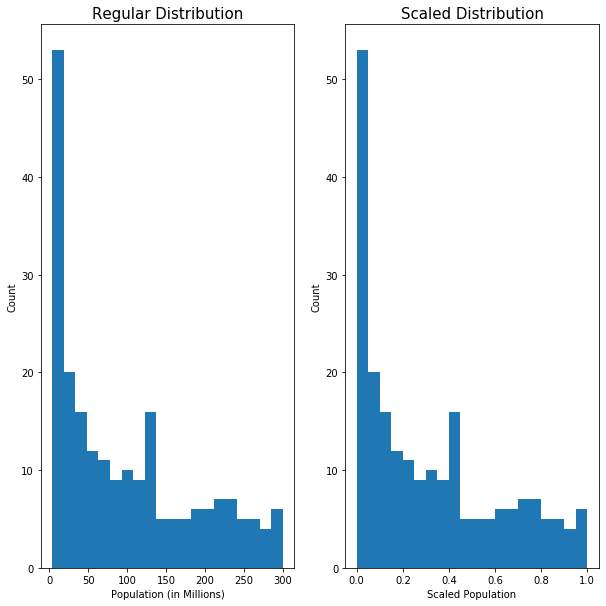

In [31]:
fig, ax=plt.subplots(1,2, figsize=(10,10))
#fig = plt.figure(figsize=(10,10))
ax[0].hist(df['Population'], bins=20)
ax[1].hist(df['Population_Scaled'], bins=20)
ax[0].set_xlabel('Population (in Millions)')
ax[0].set_ylabel('Count')
ax[1].set_xlabel('Scaled Population')
ax[1].set_ylabel('Count')
ax[0].set_title('Regular Distribution', fontsize=15, y=1)
ax[1].set_title('Scaled Distribution', fontsize=15, y=1)

### Covariance & Correlation

In [12]:
#Covariance
a = 0
for i in range(len(df)):
    x = ((np.power(df['Population'], 1/3)[i] - np.mean(np.power(df['Population'], 1/3))) * 
         (np.log(df['Adjusted GDP Per Capita'])[i] - np.mean(np.log(df['Adjusted GDP Per Capita']))))
    a += x
print(a/len(df))

1.6385068017922733


In [13]:
#Covariance - First and Last Values are individual variances of each distribution, other two values are the covariance between distributions (they are the same)
np.cov(np.power(df['Population'], 1/3), np.log(df['Adjusted GDP Per Capita']), bias=True)

array([[2.36297938, 1.6385068 ],
       [1.6385068 , 1.16895292]])

In [14]:
#Variance
np.var(np.power(df['Population'], 1/3))

2.362979376309312

In [15]:
#Variance
np.var(np.log(df['Adjusted GDP Per Capita']))

1.168952923054004

In [16]:
#Correlation
a = 0
for i in range(len(df)):
    x = ((np.power(df['Population'], 1/3)[i] - np.mean(np.power(df['Population'], 1/3))) * 
         (np.log(df['Adjusted GDP Per Capita'])[i] - np.mean(np.log(df['Adjusted GDP Per Capita']))))
    a += x
cov = a/len(df)
print(cov/(np.std(np.power(df['Population'], 1/3)) * np.std(np.log(df['Adjusted GDP Per Capita']))))

0.9858702748721357


In [17]:
#Correlation
#First Item - Correlation, Second - p.value
stats.pearsonr(np.power(df['Population'], 1/3), np.log(df['Adjusted GDP Per Capita']))

(0.9858702748721355, 8.136386715337896e-169)

In [18]:
#Get T-Value from Correlation Value
r, p_value = stats.pearsonr(np.power(df['Population'], 1/3), np.log(df['Adjusted GDP Per Capita']))
t = (r * np.sqrt((df.shape[0] - 2) / (1 - np.power(r, 2))))
t

86.29720062964726

We can set up a T-Distribution with a mean of 0, standard deviation of 1, and 215 degrees of freedom.

In [19]:
print(len(df) - 2)

215


Text(0.5, 0.92, 'T-Distribution with 215 Degrees of Freedom')

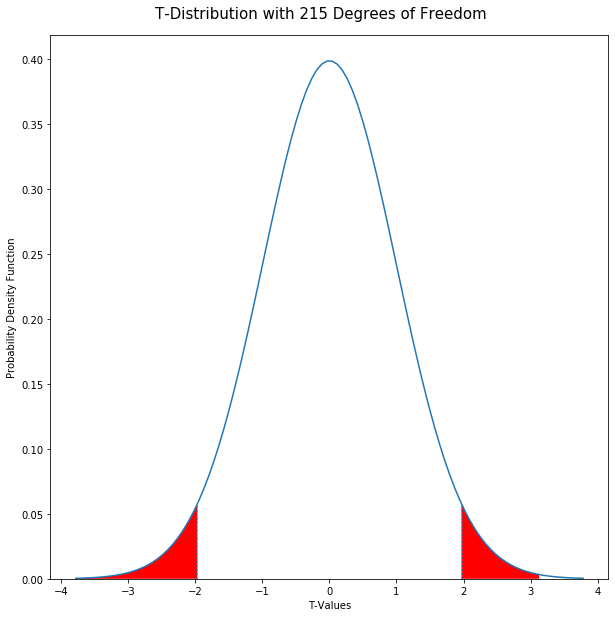

In [20]:
dist = stats.t(df=len(df) - 2)
fig = plt.figure(figsize=(10,10))
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.plot([dist.ppf(0.025), dist.ppf(0.025)],[0, dist.pdf(dist.ppf(0.025))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.0001), dist.ppf(0.025))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.plot([dist.ppf(0.975), dist.ppf(0.975)],[0, dist.pdf(dist.ppf(0.975))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.975), dist.ppf(0.999))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.ylim(bottom=0)
plt.xlabel('T-Values')
plt.ylabel('Probability Density Function')
fig.suptitle('T-Distribution with 215 Degrees of Freedom', fontsize=15, y=0.92)

The rejection regions are at -1.97 and 1.97.

In [21]:
stats.t(df=len(df) - 2).ppf(0.025)

-1.9710591221320446

In [22]:
stats.t(df=len(df) - 2).ppf(0.975)

1.9710591221320442

Our t-value of 86.30 is clearly in the rejection region.

In [23]:
stats.t(df=len(df) - 2).cdf(t)

1.0

So for a two-tailed test, we can reject the null hypothesis.

In [24]:
(1 - stats.t(df=len(df) - 2).cdf(t)) * 2

0.0

### Spearman Correlation

We can use the 'rank data' function to rank the data in our arrays.

In [25]:
stats.rankdata(df['Population'])

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 129., 128., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

And then find the Pearson correlation value of our ranked values.

In [26]:
stats.pearsonr(stats.rankdata(df['Population']), stats.rankdata(df['Adjusted GDP Per Capita']))

(0.9968916882390952, 2.9583977891212905e-239)

Or just use the Spearman R function directly.

In [27]:
stats.spearmanr(df['Population'], df['Adjusted GDP Per Capita'])

SpearmanrResult(correlation=0.9968916882390954, pvalue=2.958397789109557e-239)

Of course the Spearman correlation for the transformed data is the same as the original data.

In [28]:
stats.spearmanr(np.power(df['Population'], 1/3), np.log(df['Adjusted GDP Per Capita']))

SpearmanrResult(correlation=0.9968916882390954, pvalue=2.958397789109557e-239)